In [1]:
import numpy as np
import tensorflow as tf 
import tensorflow.keras as keras
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#tensorflow
import tensorflow as tf
from keras.layers import Dense, LSTM, Bidirectional, RNN
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.preprocessing import sequence

In [5]:
!ls subject1

Activities.csv	activities_data.csv  sensors.csv


In [6]:
activities_root = "./subject1/Activities.csv"
sensors_root = "./subject1/sensors.csv"
data_root = "./subject1/activities_data.csv"

In [8]:
#load_df:
act = pd.read_csv(activities_root)
sens = pd.read_csv(sensors_root)

In [9]:
act.head()

,Heading,Category,Subcategory,Code
0,Employment related,Employment work at home,Work at home,1
1,Employment related,Travel employment,Going out to work,5
2,Personal needs,Eating,Eating,10
3,Personal needs,Personal hygiene,Toileting,15
4,Personal needs,Personal hygiene,Bathing,20


In [18]:
sens.head()

,Code,Location,Activity
0,100,Bathroom,Toilet Flush
1,101,Bathroom,Light switch
2,104,Foyer,Light switch
3,105,Kitchen,Light switch
4,106,Kitchen,Burner


In [19]:
#load data
with open(data_root, 'r') as file:
    data = file.readlines()

In [29]:
debug = False
_Act = []
_Obs = []
_Start = []
_End = []
for i in range(int(len(data)/5)):
    _Act.append(data[i*5].split(',')[0])
    _Obs.append(data[i*5+1][:-1])
    _Start = data[i*5+3]
    _End = data[i*5+4]
    
    if debug:
        print(_Act)
        print(_Obs)
        print(_Start)
        print(_End)
        break
    
    

In [32]:
idx2act = sorted(set(_Act))

In [34]:
act2idx = {act : i for i, act in enumerate(idx2act)}

In [39]:
X = [readings.split(',') for readings in _Obs]
y = [act2idx[act] for act in _Act]

In [45]:
MAX_LEN = 300
X_np = np.array(X, dtype=object)
y_np = np.array(y, dtype=np.float32)
X_np = sequence.pad_sequences(X_np, maxlen=MAX_LEN, dtype=np.float32)

In [47]:
X_tensor = tf.convert_to_tensor(X_np, dtype=tf.float32)
y_tensor = tf.convert_to_tensor(y_np, dtype=tf.float32)

# Model ?

In [42]:
# biLSTM 
def get_biLSTM(INPUT_DIM, N_HIDDEN, MAX_LENGTH, NO_ACTIVITIES, OPTIMIZER):
    model = Sequential(name='biLSTM')
    model.add(Embedding(INPUT_DIM, N_HIDDEN, input_length=MAX_LENGTH, mask_zero=True))
    model.add((LSTM(N_HIDDEN)))
    model.add(Dense(NO_ACTIVITIES, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
    model.summary()
    return model

In [49]:
INPUT_DIM = 300 
N_HIDDEN = 64
MAX_LENGTH = MAX_LEN
NO_ACTIVITIES = len(idx2act)
OPTIMIZER = 'adam'

In [50]:
model = get_biLSTM(INPUT_DIM, N_HIDDEN, MAX_LENGTH, NO_ACTIVITIES, OPTIMIZER)

Model: "biLSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 64)           19200     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 22)                1430      
Total params: 53,654
Trainable params: 53,654
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(X_tensor, y_tensor, epochs=100,
          batch_size=16, verbose=1, validation_split=0.2)

Epoch 1/100
15/15 [==============================] - 2s 118ms/step - loss: 2.6747 - accuracy: 0.3178 - val_loss: 2.6386 - val_accuracy: 0.3220
Epoch 2/100
15/15 [==============================] - 2s 117ms/step - loss: 2.3583 - accuracy: 0.3771 - val_loss: 2.4085 - val_accuracy: 0.3559
Epoch 3/100
15/15 [==============================] - 2s 117ms/step - loss: 2.0954 - accuracy: 0.3814 - val_loss: 2.3113 - val_accuracy: 0.4237
Epoch 4/100
15/15 [==============================] - 2s 120ms/step - loss: 1.9078 - accuracy: 0.3983 - val_loss: 2.2712 - val_accuracy: 0.4237
Epoch 5/100
15/15 [==============================] - 2s 118ms/step - loss: 1.7716 - accuracy: 0.4534 - val_loss: 2.2559 - val_accuracy: 0.4237
Epoch 6/100
15/15 [==============================] - 2s 119ms/step - loss: 1.6553 - accuracy: 0.5127 - val_loss: 2.2320 - val_accuracy: 0.4237
Epoch 7/100
15/15 [==============================] - 2s 117ms/step - loss: 1.5403 - accuracy: 0.5381 - val_loss: 2.2335 - val_accuracy: 0.4576

Epoch 58/100
15/15 [==============================] - 2s 118ms/step - loss: 0.1159 - accuracy: 0.9661 - val_loss: 2.4426 - val_accuracy: 0.5424
Epoch 59/100
15/15 [==============================] - 2s 115ms/step - loss: 0.1138 - accuracy: 0.9661 - val_loss: 2.4689 - val_accuracy: 0.5593
Epoch 60/100
15/15 [==============================] - 2s 116ms/step - loss: 0.1097 - accuracy: 0.9703 - val_loss: 2.4651 - val_accuracy: 0.5593
Epoch 61/100
15/15 [==============================] - 2s 116ms/step - loss: 0.1078 - accuracy: 0.9619 - val_loss: 2.4926 - val_accuracy: 0.5593
Epoch 62/100
15/15 [==============================] - 2s 115ms/step - loss: 0.1065 - accuracy: 0.9703 - val_loss: 2.5058 - val_accuracy: 0.5424
Epoch 63/100
15/15 [==============================] - 2s 117ms/step - loss: 0.1027 - accuracy: 0.9703 - val_loss: 2.5041 - val_accuracy: 0.5424
Epoch 64/100
15/15 [==============================] - 2s 117ms/step - loss: 0.0992 - accuracy: 0.9746 - val_loss: 2.4945 - val_accuracy:

In [55]:
def plot_history(dict):
    # summarize history for accuracy
    plt.figure(figsize=(10,10))
    plt.plot(dict['accuracy'])
    plt.plot(dict['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.figure(figsize=(10,10))
    plt.plot(dict['loss'])
    plt.plot(dict['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

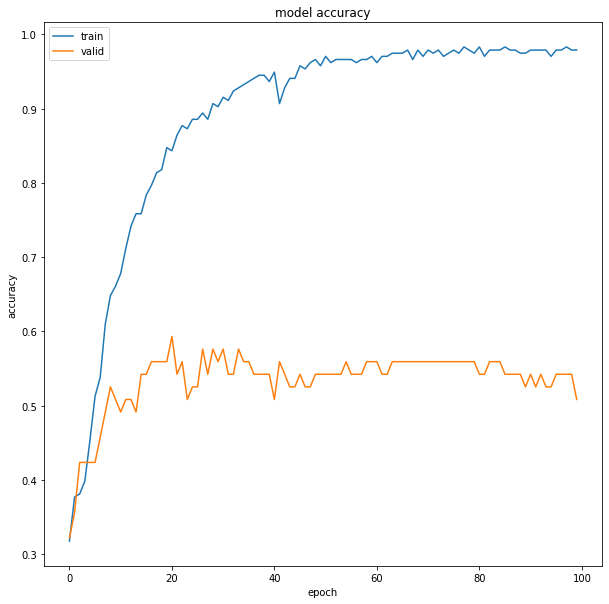

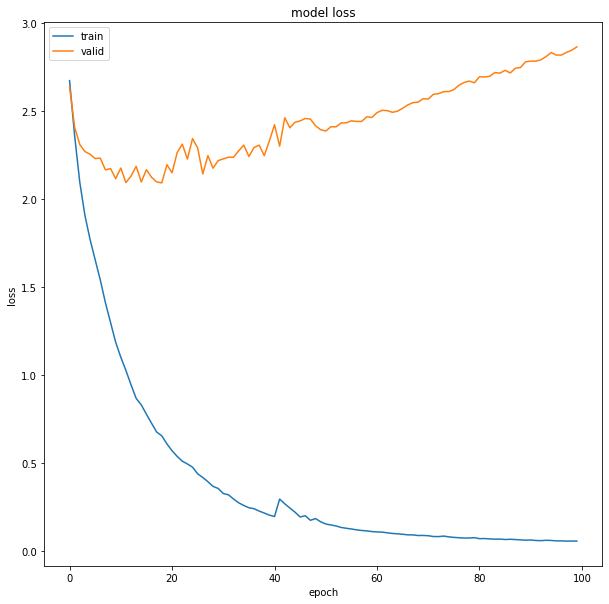

In [56]:
plot_historyhistory(history.history)

In [61]:
model2 = get_biLSTM(INPUT_DIM, N_HIDDEN, MAX_LENGTH, NO_ACTIVITIES, OPTIMIZER)

Model: "biLSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 64)           19200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 22)                1430      
Total params: 53,654
Trainable params: 53,654
Non-trainable params: 0
_________________________________________________________________


In [62]:
history2 = model2.fit(X_tensor, y_tensor, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 2s 214ms/step - loss: 3.0799 - accuracy: 0.1695 - val_loss: 3.0617 - val_accuracy: 0.3220
Epoch 2/50
8/8 [==============================] - 1s 121ms/step - loss: 3.0365 - accuracy: 0.2966 - val_loss: 3.0199 - val_accuracy: 0.3051
Epoch 3/50
8/8 [==============================] - 1s 120ms/step - loss: 2.9651 - accuracy: 0.2797 - val_loss: 2.9354 - val_accuracy: 0.3051
Epoch 4/50
8/8 [==============================] - 1s 120ms/step - loss: 2.8123 - accuracy: 0.2839 - val_loss: 2.8552 - val_accuracy: 0.2881
Epoch 5/50
8/8 [==============================] - 1s 120ms/step - loss: 2.6038 - accuracy: 0.3093 - val_loss: 2.6318 - val_accuracy: 0.3051
Epoch 6/50
8/8 [==============================] - 1s 122ms/step - loss: 2.4062 - accuracy: 0.3602 - val_loss: 2.4614 - val_accuracy: 0.3051
Epoch 7/50
8/8 [==============================] - 1s 122ms/step - loss: 2.2173 - accuracy: 0.3814 - val_loss: 2.3388 - val_accuracy: 0.3898
Epoch 8/50
8/8 [====

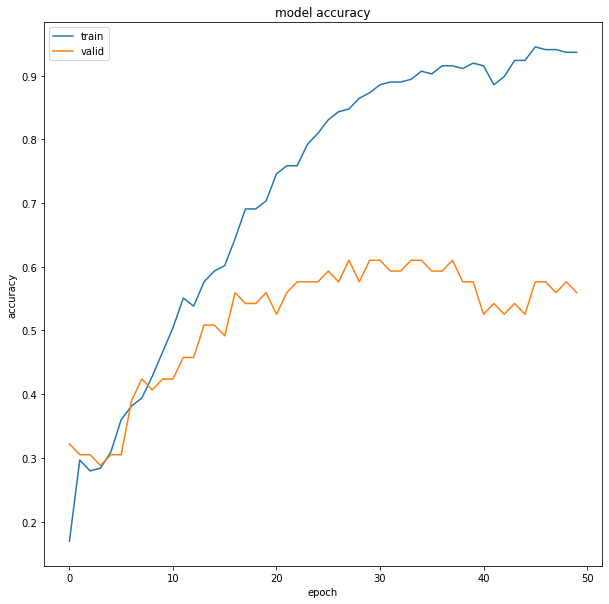

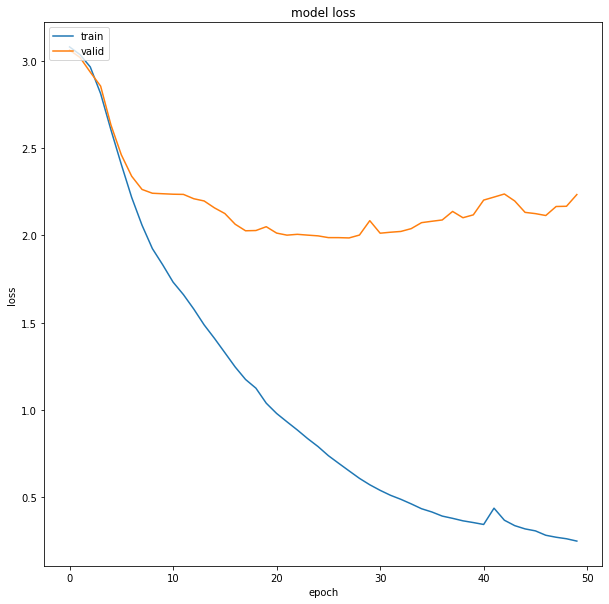

In [63]:
plot_history(history2.history)